## CNN Model

### Importing necessary libraries

In [116]:
!pip install graphviz

In [117]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D
from keras_visualizer import visualizer

from keras.utils import plot_model
#from keras.callbacks import Callback

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm 

In [118]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [119]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6129027817336443807,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3044750132
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17341872392528634371
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [120]:
y_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
batch_size = 128
epochs = 20
num_classes = 11 #26

In [121]:
x_data = np.load('x_data.npy')
y_data = np.load('y_data.npy')
x_dimm, y_dimm = x_data.shape[1:]

In [122]:
print(x_data.shape)
print(y_data.shape)
print(x_dimm, y_dimm)

(98673, 7, 9)
(98673,)
7 9


In [123]:
# shuffling and splitting the data into trainning and testing data
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    train_size = 0.90)

## Adding an extra dimension to the input data since Conv2D layer accepts a 4D tensor as input

In [124]:
x_train = x_train.reshape(x_train.shape[0], x_dimm, y_dimm, 1)
x_test = x_test.reshape(x_test.shape[0],    x_dimm, y_dimm, 1)

In [125]:
print("x_train = ", x_train.shape)
print("y_train = ",y_train.shape)

print("x_test  = ",x_test.shape)
print("y_train = ",y_train.shape)

x_train =  (88805, 7, 9, 1)
y_train =  (88805,)
x_test  =  (9868, 7, 9, 1)
y_train =  (88805,)


## One-hot encoding the y labels

In [126]:
encoder = LabelBinarizer()
y_train_cat = encoder.fit_transform(y_train)
y_test_cat  = encoder.fit_transform(y_test)

In [127]:
print("y_train_cat = ",y_train_cat.shape)
print("y_test_cat  = ",y_test_cat.shape)

y_train_cat =  (88805, 11)
y_test_cat  =  (9868, 11)


## Creating the baseline model.

In [128]:
def baseline_model():
    model = Sequential()
    
    #convoltional layer
    model.add(Conv2D(32, 
                    kernel_size = (3,3),
                    activation = 'relu',
                    input_shape = x_train.shape[1:]))
    model.add(Flatten())
    
    #dense layers
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.1))
    
    #output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])
    
    print(model.summary())
    return model

In [129]:
baseline = baseline_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 5, 7, 32)          320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1120)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 400)               448400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)               

In [130]:
baseline_log = baseline.fit(x_train, 
             y_train_cat, 
             batch_size = batch_size, 
             epochs = epochs, 
             validation_split = 0.2,
             verbose=1)

Epoch 1/20
556/556 [==============================] - 5s 8ms/step - loss: 1.0599 - accuracy: 0.6433 - val_loss: 0.1969 - val_accuracy: 0.9420
Epoch 2/20
556/556 [==============================] - 4s 7ms/step - loss: 0.2371 - accuracy: 0.9306 - val_loss: 0.1637 - val_accuracy: 0.9485
Epoch 3/20
556/556 [==============================] - 4s 7ms/step - loss: 0.1899 - accuracy: 0.9427 - val_loss: 0.1355 - val_accuracy: 0.9572
Epoch 4/20
556/556 [==============================] - 4s 7ms/step - loss: 0.1650 - accuracy: 0.9504 - val_loss: 0.1238 - val_accuracy: 0.9590
Epoch 5/20
556/556 [==============================] - 4s 7ms/step - loss: 0.1467 - accuracy: 0.9554 - val_loss: 0.1301 - val_accuracy: 0.9588
Epoch 6/20
556/556 [==============================] - 4s 7ms/step - loss: 0.1333 - accuracy: 0.9588 - val_loss: 0.1137 - val_accuracy: 0.9626
Epoch 7/20
556/556 [==============================] - 4s 7ms/step - loss: 0.1271 - accuracy: 0.9614 - val_loss: 0.1018 - val_accuracy: 0.9669
Epoch 

## Function to plot the accuracy and loss of a model

In [131]:
def plot_accuracy(model, history):
    eval_loss, eval_accuracy = model.evaluate(x_test, y_test_cat, verbose = 0)
    #print(history.history['loss'])
    print("Train loss          = ", history.history['loss'][-1])
    print("Train accuracy      = ", history.history['accuracy'][-1])
    print()
    print("Validation loss     = ", history.history['val_loss'][-1])
    print("Validation accuracy = ", history.history['val_accuracy'][-1])
    print()
    print("test loss           = ",eval_loss)
    print("test accuracy       = ",eval_accuracy)
    plt.subplot(2,1,1)
    
    plt.title('Model Accuracy')
    plt.plot(range(epochs), history.history['accuracy'])
    plt.plot(range(epochs), history.history['val_accuracy'])

    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.subplot(2,1,2)
    plt.title('Model loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.tight_layout()

Train loss          =  0.06687166541814804
Train accuracy      =  0.9781684875488281

Validation loss     =  0.08188892155885696
Validation accuracy =  0.9754518270492554

test loss           =  0.07535407692193985
test accuracy       =  0.9780097007751465


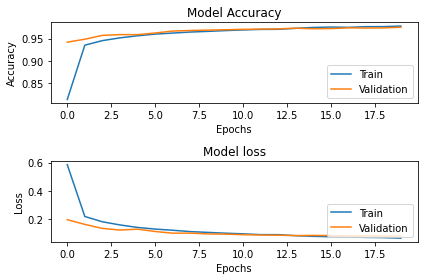

In [132]:
plot_accuracy(baseline, baseline_log)

In [133]:
test_log = baseline.evaluate(x_test, y_test_cat)
print("test_loss = ", test_log[0])
print("test_accuracy = ", test_log[1])

309/309 [==============================] - 1s 4ms/step - loss: 0.0754 - accuracy: 0.9780
test_accuracy =  0.07535407692193985
test_loss =  0.9780097007751465


In [134]:
print(x_train[1].shape)

(7, 9, 1)


In [135]:
cat_accuracy = [[0, 0, 0]]*num_classes
cat_matrix = np.array( [[0]*num_classes]*num_classes)

l = len(x_test)

for i in tqdm( range(l) ):
    x = x_test[i]
    y = y_test_cat[i]
    
    x = x.reshape(1, 7, 9, 1)
    res = np.argmax(baseline.predict(x)) 
    cat_matrix[np.argmax(y)][res] += 1

100%|████████████████████████████████████████████████████████████████████████████████████████████| 9868/9868 [09:20<00:00, 17.61it/s]


In [136]:
cat_matrix

array([[874,   0,   2,   5,   4,   0,   2,   0,   2,   2,   2],
       [  1, 881,   0,   5,   3,   0,   0,   0,   0,   0,   3],
       [  2,   3, 889,   2,   1,   0,   2,   0,   0,   0,   3],
       [  2,   1,   2, 884,   0,   0,   1,   1,   4,   1,   4],
       [ 19,   4,   3,   5, 815,   0,   2,   3,   4,   4,   0],
       [  0,   4,   5,   1,   1, 938,   4,   1,   3,   2,   4],
       [  0,   0,   3,   1,   0,   0, 886,  12,   3,   3,   2],
       [  0,   0,   1,   0,   0,   1,  23, 901,   0,   2,   2],
       [  2,   0,   1,   1,   2,   1,   1,   0, 856,   2,   0],
       [  1,   0,   1,   0,   0,   0,   3,   3,   2, 870,   1],
       [  0,   1,   0,   6,   0,   2,   2,   1,   2,   0, 857]])

In [144]:
cat_matrix_per = np.array( [[0]*num_classes]*num_classes, dtype = 'float32')
for i in range(num_classes):
    total = np.sum(cat_matrix[i])
    for j in range(num_classes):
        cat_matrix_per[i][j] = cat_matrix[i][j]/total

In [150]:
np.set_printoptions(precision=2)
print(cat_matrix_per)

[[0.98 0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.01 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.98 0.   0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.   0.01 0.95 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.   0.97 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.97 0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.02 0.97 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.99 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.99 0.  ]
 [0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.98]]


In [140]:
baseline.save("baseline.model", save_format="h5")